In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

In [3]:
#|export
learn = load_learner('model.pkl')

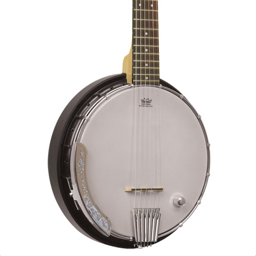

In [10]:
from fastbook import *
urls = search_images_ddg('banjo',1)
from fastdownload import download_url
dest = 'banjo.jpg'
download_url(urls[0], dest, show_progress=False)

im = Image.open(dest)
im.to_thumb(256,256)

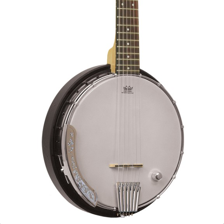

In [11]:
img = PILImage.create('banjo.jpg')
img.thumbnail((224,224))
img

In [12]:
learn.predict(img)

('banjo',
 tensor(6),
 tensor([1.4622e-08, 1.3862e-06, 3.5090e-08, 4.3218e-09, 3.4096e-08, 1.7398e-08, 9.9985e-01, 3.8490e-07, 9.3956e-09, 1.1868e-07, 1.3017e-08, 2.3738e-08, 5.9137e-08, 1.1586e-06, 9.3743e-05, 4.9369e-08,
         4.3401e-08, 1.9747e-05, 1.2774e-08, 3.4904e-08, 2.5979e-08, 7.4958e-08, 1.3946e-08, 3.6679e-07, 3.2149e-05, 7.3845e-07, 5.5721e-09, 6.6391e-08, 1.1157e-08, 7.7292e-07]))

In [13]:
#|export
categories = ('didgeridoo','tambourine','xylophone','acordian','alphorn','bagpipes','banjo','bongo drum','casaba','castanets','clarinet','clavichord','concertina','drums','dulcimer','flute','guiro','guitar','harmonica','harp','marakas','ocarina','piano','saxaphone','sitar','steel drum','trombone','trumpet','tuba','violin')
def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories,map(float,probs)))

In [14]:
classify_image(img)

{'didgeridoo': 1.4622210997572438e-08,
 'tambourine': 1.3861721299690544e-06,
 'xylophone': 3.508997536982861e-08,
 'acordian': 4.321847324462169e-09,
 'alphorn': 3.409623516859028e-08,
 'bagpipes': 1.7397754348280614e-08,
 'banjo': 0.9998489618301392,
 'bongo drum': 3.8489781672979007e-07,
 'casaba': 9.395575872872541e-09,
 'castanets': 1.1868442584272998e-07,
 'clarinet': 1.3017473321497164e-08,
 'clavichord': 2.3737676713153633e-08,
 'concertina': 5.913716094596566e-08,
 'drums': 1.158644181487034e-06,
 'dulcimer': 9.374329965794459e-05,
 'flute': 4.936883968298389e-08,
 'guiro': 4.340081005693719e-08,
 'guitar': 1.974727274500765e-05,
 'harmonica': 1.277387617903969e-08,
 'harp': 3.490360711566609e-08,
 'marakas': 2.597880843779876e-08,
 'ocarina': 7.495769693832699e-08,
 'piano': 1.3946065635650484e-08,
 'saxaphone': 3.667904593385174e-07,
 'sitar': 3.214850221411325e-05,
 'steel drum': 7.384476248262217e-07,
 'trombone': 5.572144079479813e-09,
 'trumpet': 6.639149319198623e-08,
 

In [15]:
#|export
image = gr.inputs.Image(shape=(224,224))
label=gr.outputs.Label()
examples=['banjo.jpg']
intf = gr.Interface(fn=classify_image,inputs=image,outputs=label,examples=examples)
intf.launch(inline=False)

/home/tux/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/tux/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/tux/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/tux/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## Export

In [17]:
from nbdev.export import nb_export
nb_export('app.ipynb')